# Notebook 2: Exploratory Data Analysis (EDA)

This notebook performs exploratory data analysis on the cleaned dataset.

## Steps:
1. Load cleaned dataset
2. Dataset statistics
3. Engagement analysis
4. Temporal analysis
5. Text analysis
6. WordCloud visualization
7. N-gram analysis
8. Save visualizations

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from collections import Counter
import re

# Add project root to path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Import custom modules
from src import utils

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 150)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Cleaned Dataset

In [18]:
# Load cleaned dataset
data_path = utils.get_processed_data_path('tweets_cleaned.csv')
df = pd.read_csv(data_path)

print(f"\n{'='*60}")
print(f"DATASET LOADED")
print(f"{'='*60}")
print(f"Total tweets: {len(df)}")
print(f"Columns: {list(df.columns)}")
print(f"Shape: {df.shape}")
print(f"{'='*60}\n")


DATASET LOADED
Total tweets: 330
Columns: ['Tweet Link', 'Author Handle', 'Tweet Content', 'Views', 'Likes', 'Retweets', 'Replies', 'Tweet Creation Date', 'Scraped Date', 'engagement_score', 'tweet_length', 'word_count', 'hashtag_count', 'mention_count']
Shape: (330, 14)



## 2. Dataset Statistics

In [19]:
# Display basic statistics
print("Dataset Statistics:")
print(f"\nNumerical Columns:")
print(df.describe())

print(f"\n\nData Types:")
print(df.dtypes)

print(f"\n\nMissing Values:")
print(df.isnull().sum())

Dataset Statistics:

Numerical Columns:
              Views         Likes     Retweets      Replies  engagement_score  \
count  3.300000e+02    330.000000   330.000000   330.000000        330.000000   
mean   4.406460e+05    249.421212    32.875758    19.293939        373.054545   
std    6.529151e+06   3293.818268   518.097378   308.888666       5250.007037   
min    0.000000e+00      0.000000     0.000000     0.000000          0.000000   
25%    1.825000e+02      1.000000     0.000000     0.000000          2.000000   
50%    9.715000e+02      3.000000     0.000000     0.000000          5.000000   
75%    4.129500e+03     11.000000     0.000000     2.000000         20.750000   
max    1.179307e+08  59410.000000  9390.000000  5612.000000      95026.000000   

       tweet_length  word_count  hashtag_count  mention_count  
count    330.000000  330.000000     330.000000     330.000000  
mean      70.624242   12.787879       0.006061       0.021212  
std       61.264373   10.327635       

## 3. Engagement Analysis

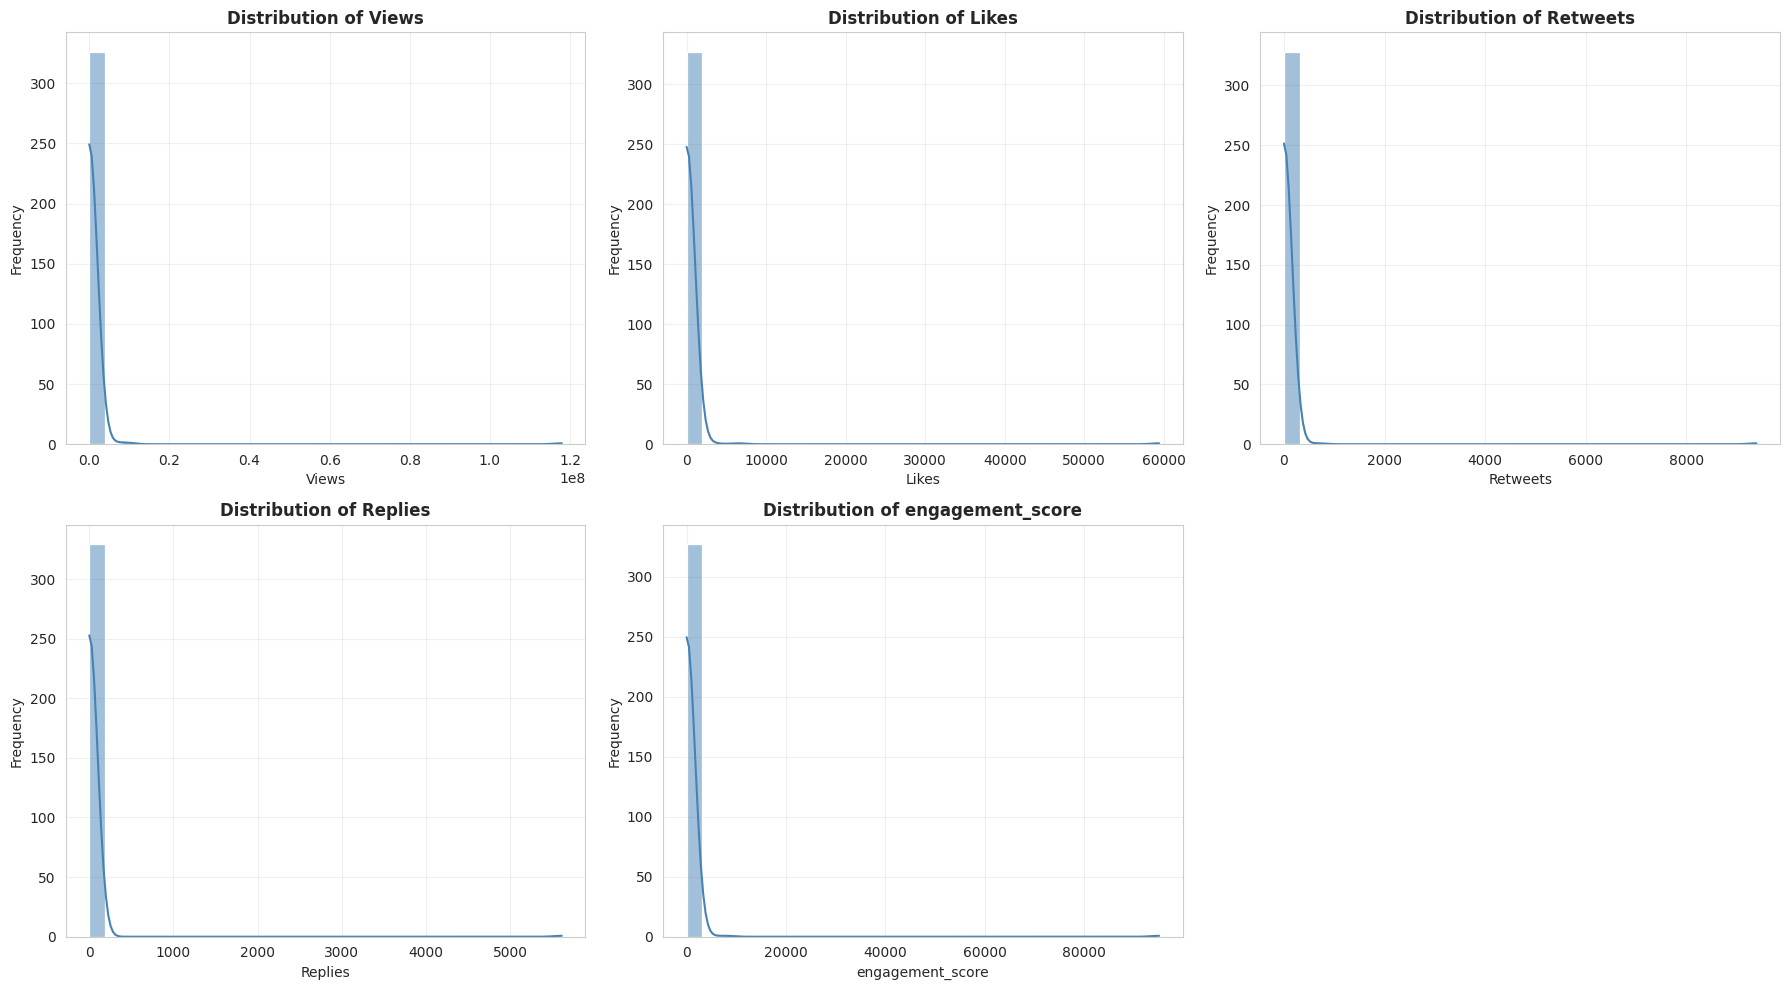

✓ Engagement distribution plot saved


In [20]:
# Engagement statistics
engagement_cols = ['Views', 'Likes', 'Retweets', 'Replies', 'engagement_score']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(engagement_cols):
    if col in df.columns:
        ax = axes[i]
        sns.histplot(df[col], bins=30, kde=True, ax=ax, color='steelblue')
        ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.grid(True, alpha=0.3)

# Hide empty subplot
axes[-1].axis('off')

plt.tight_layout()
plt.savefig(utils.get_outputs_path('figures/engagement_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("✓ Engagement distribution plot saved")

In [21]:
# Top 10 most engaged tweets
top_engaged = df.nlargest(10, 'engagement_score')[['Tweet Content', 'engagement_score', 'Likes', 'Retweets', 'Replies']]

print("\nTop 10 Most Engaged Tweets:")
print(top_engaged.to_string(index=False))


Top 10 Most Engaged Tweets:
                                                                                                                                                                                                                                                                             Tweet Content  engagement_score  Likes  Retweets  Replies
                                                                                                                                     OFFICIAL: Chelsea confirm Liam Rosenior as their new head coach on a contract valid until June 2032.\n\nSix year and half contract for the new coach.             95026  59410      9390     5612
                                                                                                                                                                                                                                                            Have the best experience on X.              7815   6479       668

## 4. Temporal Analysis

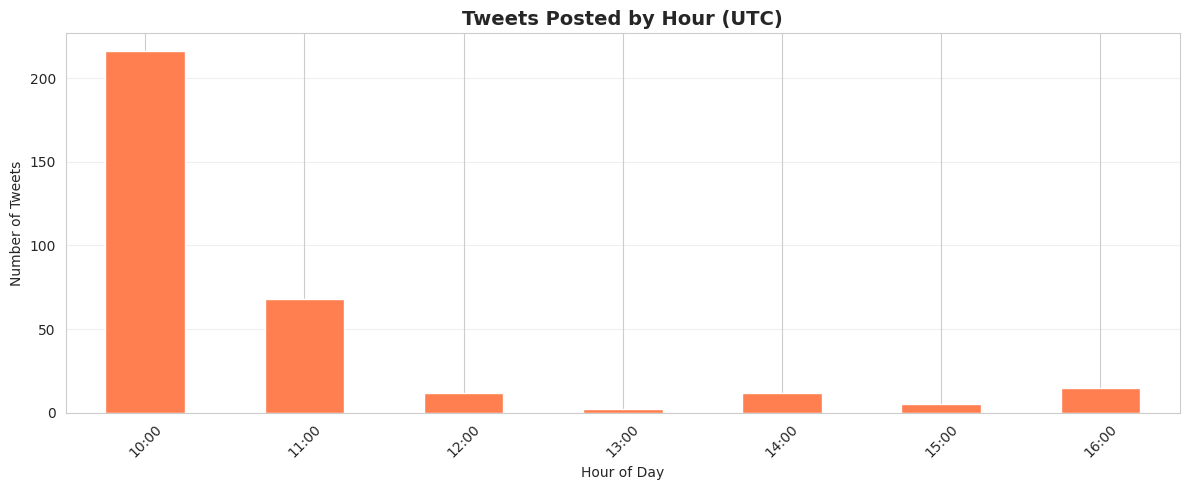

[OK] Temporal analysis plot saved


In [22]:
# Convert timestamp to datetime
# Use format='mixed' to handle different timestamp formats
df['Tweet Creation Date'] = pd.to_datetime(df['Tweet Creation Date'], format='mixed', utc=True)

# Extract temporal features
df['hour'] = df['Tweet Creation Date'].dt.hour
df['day'] = df['Tweet Creation Date'].dt.day_name()

# Plot tweets by hour
fig, ax = plt.subplots(figsize=(12, 5))
hourly_counts = df['hour'].value_counts().sort_index()
hourly_counts.plot(kind='bar', color='coral', ax=ax)
ax.set_title('Tweets Posted by Hour (UTC)', fontsize=14, fontweight='bold')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Tweets')
# Use actual hour values from data for labels
ax.set_xticklabels([f'{int(h)}:00' for h in hourly_counts.index], rotation=45)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(utils.get_outputs_path('figures/tweets_by_hour.png'), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("[OK] Temporal analysis plot saved")

## 5. Text Analysis

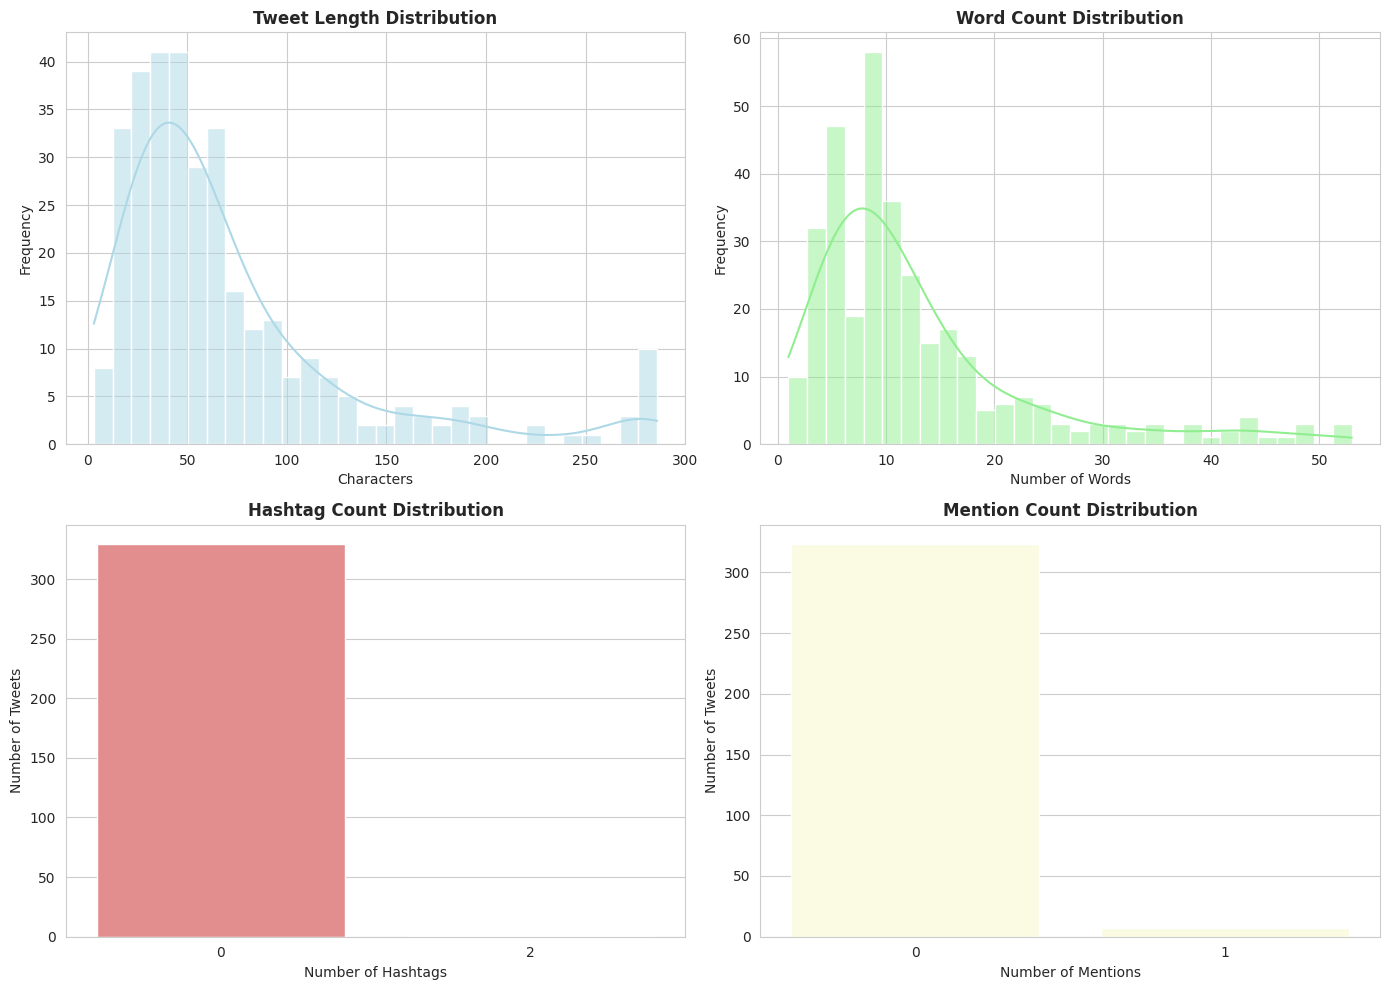

✓ Text statistics plot saved


In [23]:
# Text statistics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Tweet length distribution
sns.histplot(df['tweet_length'], bins=30, kde=True, color='lightblue', ax=axes[0, 0])
axes[0, 0].set_title('Tweet Length Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Characters')
axes[0, 0].set_ylabel('Frequency')

# Word count distribution
sns.histplot(df['word_count'], bins=30, kde=True, color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Word Count Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Number of Words')
axes[0, 1].set_ylabel('Frequency')

# Hashtag count
sns.countplot(x='hashtag_count', data=df, color='lightcoral', ax=axes[1, 0])
axes[1, 0].set_title('Hashtag Count Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Number of Hashtags')
axes[1, 0].set_ylabel('Number of Tweets')

# Mention count
sns.countplot(x='mention_count', data=df, color='lightyellow', ax=axes[1, 1])
axes[1, 1].set_title('Mention Count Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Number of Mentions')
axes[1, 1].set_ylabel('Number of Tweets')

plt.tight_layout()
plt.savefig(utils.get_outputs_path('figures/text_statistics.png'), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("✓ Text statistics plot saved")

## 6. WordCloud Visualization

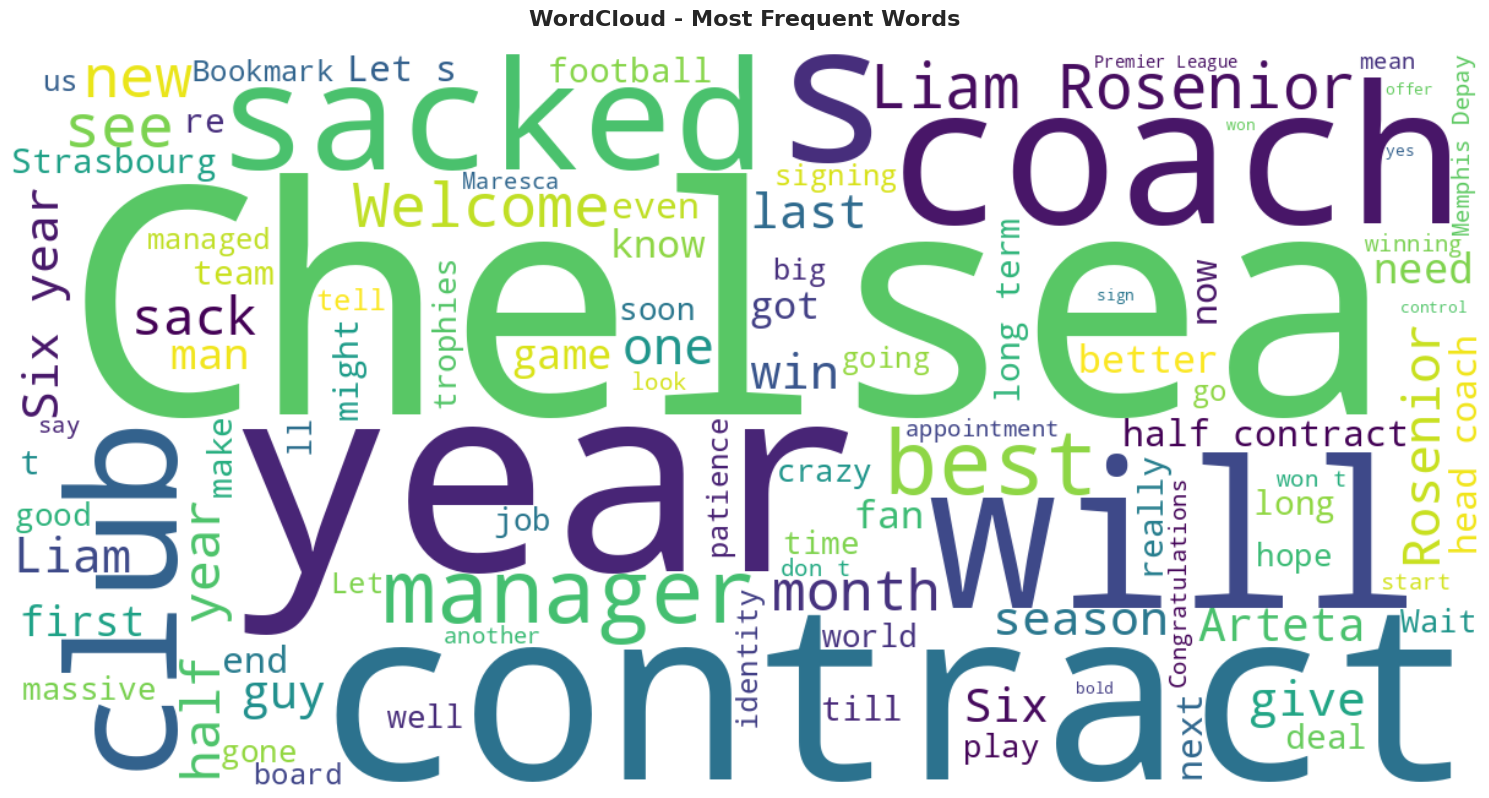

✓ WordCloud saved


In [24]:
from wordcloud import WordCloud, STOPWORDS

# Combine all tweets into one text
all_text = ' '.join(df['Tweet Content'].astype(str).tolist())

# Create WordCloud
wordcloud = WordCloud(
    width=1200, 
    height=600, 
    background_color='white',
    stopwords=STOPWORDS,
    max_words=100,
    colormap='viridis'
).generate(all_text)

# Plot WordCloud
fig, ax = plt.subplots(figsize=(15, 8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
ax.set_title('WordCloud - Most Frequent Words', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig(utils.get_outputs_path('figures/wordcloud.png'), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("✓ WordCloud saved")

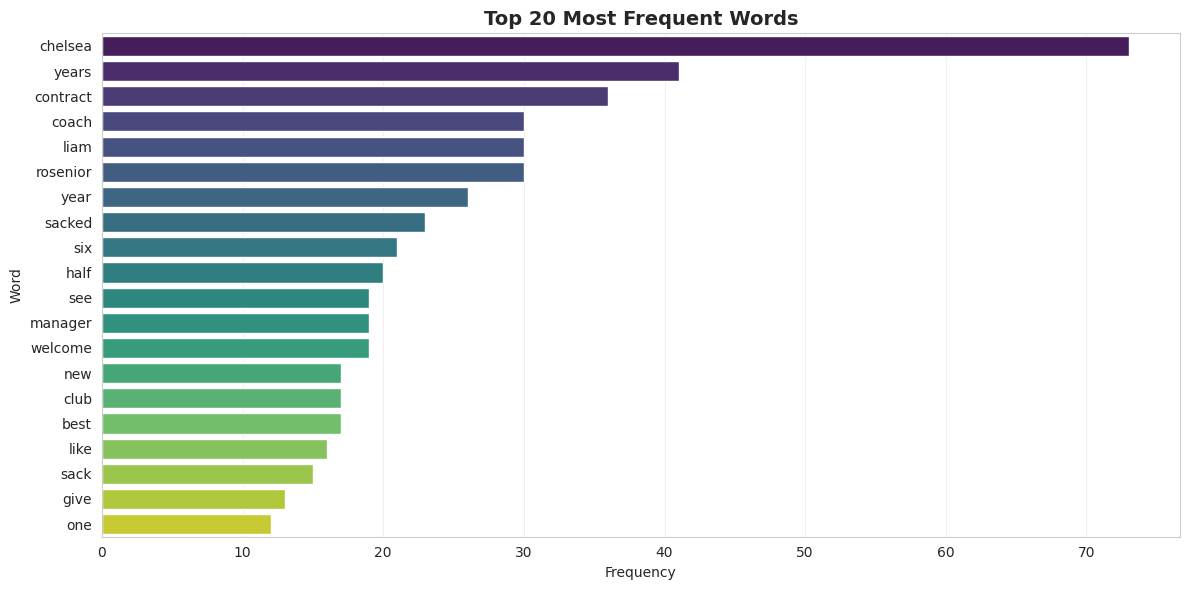

✓ Top words plot saved

Top 20 words:
  chelsea: 73
  years: 41
  contract: 36
  coach: 30
  liam: 30
  rosenior: 30
  year: 26
  sacked: 23
  six: 21
  half: 20
  see: 19
  manager: 19
  welcome: 19
  new: 17
  club: 17
  best: 17
  like: 16
  sack: 15
  give: 13
  one: 12


In [25]:
# Top 20 most frequent words
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

# Tokenize and remove stopwords
all_words = []
for text in df['Tweet Content'].astype(str):
    words = text.lower().split()
    words = [w for w in words if w.isalpha() and w not in stop_words]
    all_words.extend(words)

# Count word frequencies
word_freq = Counter(all_words)
top_20_words = word_freq.most_common(20)

# Plot top 20 words
fig, ax = plt.subplots(figsize=(12, 6))
words = [w[0] for w in top_20_words]
counts = [w[1] for w in top_20_words]
sns.barplot(
    x=counts,
    y=words,
    hue=words,
    palette='viridis',
    legend=False,
    ax=ax
)
ax.set_title('Top 20 Most Frequent Words', fontsize=14, fontweight='bold')
ax.set_xlabel('Frequency')
ax.set_ylabel('Word')
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig(utils.get_outputs_path('figures/top_words.png'), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("✓ Top words plot saved")
print("\nTop 20 words:")
for word, count in top_20_words:
    print(f"  {word}: {count}")

## 7. N-Gram Analysis

In [26]:
# Extract bigrams and trigrams
from nltk import bigrams, trigrams

# Prepare text data
all_words_for_ngrams = []
for text in df['Tweet Content'].astype(str):
    words = text.lower().split()
    words = [w for w in words if w.isalpha() and w not in stop_words]
    all_words_for_ngrams.extend(words)

# Generate bigrams
bigram_list = list(bigrams(all_words_for_ngrams))
bigram_freq = Counter(bigram_list)
top_20_bigrams = bigram_freq.most_common(20)

# Generate trigrams
trigram_list = list(trigrams(all_words_for_ngrams))
trigram_freq = Counter(trigram_list)
top_20_trigrams = trigram_freq.most_common(20)

# Prepare data for plotting
bigram_words = [' '.join(bg[0]) for bg in top_20_bigrams]
bigram_counts = [bg[1] for bg in top_20_bigrams]

trigram_words = [' '.join(tg[0]) for tg in top_20_trigrams]
trigram_counts = [tg[1] for tg in top_20_trigrams]

print(f"✓ Extracted {len(bigram_freq)} unique bigrams")
print(f"✓ Extracted {len(trigram_freq)} unique trigrams")

✓ Extracted 1737 unique bigrams
✓ Extracted 1891 unique trigrams


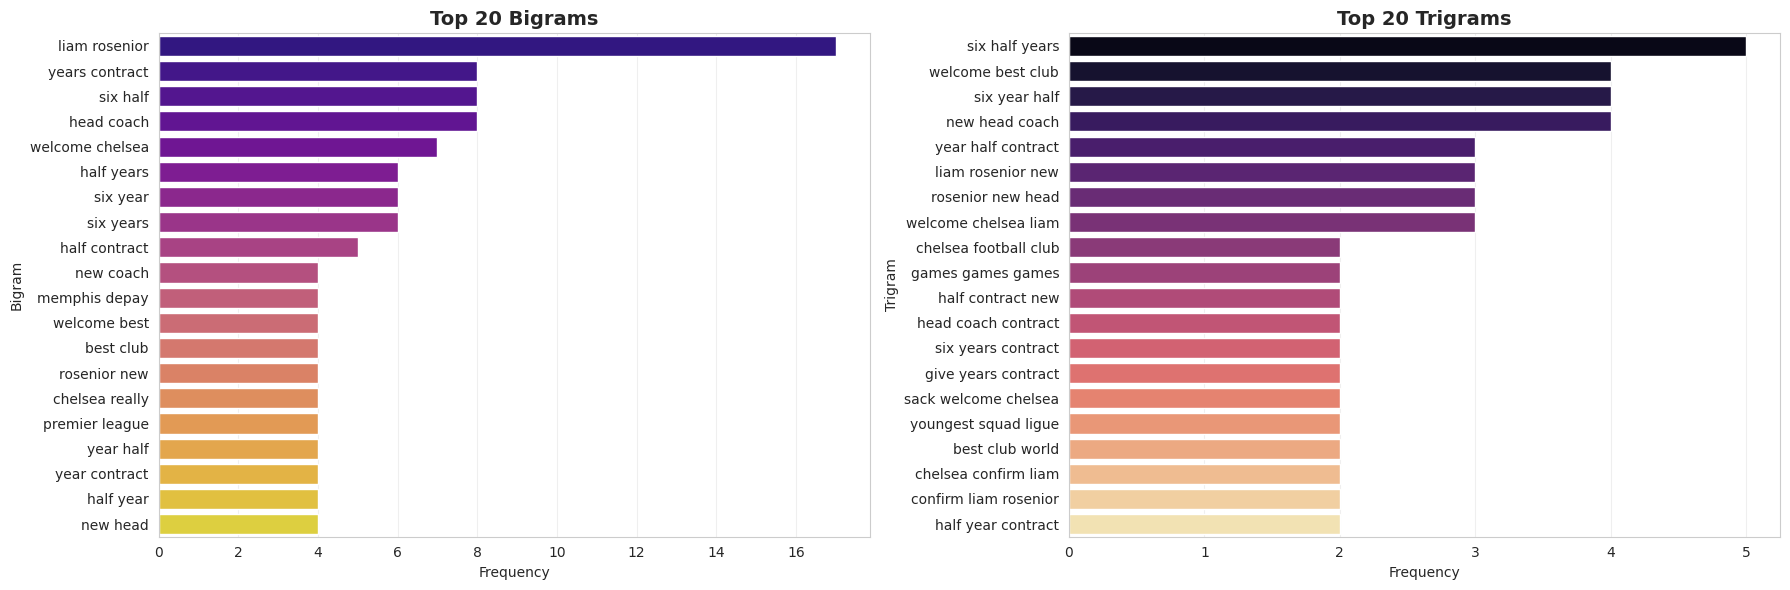

✓ N-grams plot saved


In [27]:
# Plot bigrams & trigrams
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Bigrams
sns.barplot(
    x=bigram_counts,
    y=bigram_words,
    hue=bigram_words,
    palette='plasma',
    legend=False,
    ax=ax1
)
ax1.set_title('Top 20 Bigrams', fontsize=14, fontweight='bold')
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Bigram')
ax1.grid(True, alpha=0.3, axis='x')

# Trigrams
sns.barplot(
    x=trigram_counts,
    y=trigram_words,
    hue=trigram_words,
    palette='magma',
    legend=False,
    ax=ax2
)
ax2.set_title('Top 20 Trigrams', fontsize=14, fontweight='bold')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Trigram')
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig(utils.get_outputs_path('figures/ngrams.png'), dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print("✓ N-grams plot saved")

## 8. Save EDA Summary

In [28]:
# Create EDA summary
eda_summary = {
    'total_tweets': len(df),
    'avg_tweet_length': df['tweet_length'].mean(),
    'avg_word_count': df['word_count'].mean(),
    'avg_likes': df['Likes'].mean(),
    'avg_retweets': df['Retweets'].mean(),
    'avg_replies': df['Replies'].mean(),
    'total_likes': df['Likes'].sum(),
    'total_retweets': df['Retweets'].sum(),
    'total_replies': df['Replies'].sum()
}

# Save to CSV
eda_df = pd.DataFrame([eda_summary])
eda_df.to_csv(utils.get_outputs_path('tables/eda_summary.csv'), index=False)

print("\n" + "="*60)
print("EDA SUMMARY")
print("="*60)
for key, value in eda_summary.items():
    print(f"{key}: {value:.2f}")
print("="*60)

print("\n✓ EDA summary saved to outputs/tables/eda_summary.csv")


EDA SUMMARY
total_tweets: 330.00
avg_tweet_length: 70.62
avg_word_count: 12.79
avg_likes: 249.42
avg_retweets: 32.88
avg_replies: 19.29
total_likes: 82309.00
total_retweets: 10849.00
total_replies: 6367.00

✓ EDA summary saved to outputs/tables/eda_summary.csv


## ✅ EDA Complete!

**Visualizations Saved:**
- `engagement_distribution.png`
- `tweets_by_hour.png`
- `text_statistics.png`
- `wordcloud.png`
- `top_words.png`
- `ngrams.png`

**Tables Saved:**
- `eda_summary.csv`

**Next Steps:**

→ **`3_sentiment_labeling.ipynb`** - Apply VADER sentiment analysis